In [1]:
# Cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# Cell 2
def load_data(file_path):
    df = pd.read_csv(file_path)
    df.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
    df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
    df['open_time'] = pd.to_datetime(df['open_time'] * 1000, unit='ms')
    return df

In [3]:
# Cell 3
def plot_close_price_history(df):
    plt.figure(figsize=(12.5, 4.5))
    plt.plot(df['close_time'], df['close_price'], label='ETH Close Price')
    plt.title('ETH Close Price History')
    plt.xlabel('Date')
    plt.ylabel('Price USD ($)')
    plt.legend(loc='upper left')
    plt.show()

In [4]:
# Cell 4
def slice_data_by_date(df, start_date):
    return df[df['close_time'] >= start_date]

In [5]:
# Cell 5
def add_moving_averages(sliced_df, ma_days):
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        sliced_df.loc[:, column_name] = sliced_df['close_price'].rolling(ma).mean()
    return sliced_df

In [6]:
# Cell 6
def plot_moving_averages(sliced_df, ma_days):
    plt.figure(figsize=(12.5, 4.5))
    plt.plot(sliced_df['close_time'], sliced_df['close_price'], label='ETH Close Price')
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        plt.plot(sliced_df['close_time'], sliced_df[column_name], label=column_name)
    plt.title('ETH Close Price History')
    plt.xlabel('Date')
    plt.ylabel('Price USD ($)')
    plt.legend(loc='upper left')
    plt.show()

In [7]:
# Cell 7
def add_daily_returns(sliced_df):
    sliced_df['daily_return'] = sliced_df['close_price'].pct_change()
    return sliced_df

In [8]:
# Cell 8
def plot_daily_returns(sliced_df):
    plt.figure(figsize=(12.5, 4.5))
    plt.plot(sliced_df['close_time'], sliced_df['daily_return'], label='ETH Daily Return')
    plt.title('ETH Daily Return History')
    plt.xlabel('Date')
    plt.ylabel('Percent')
    plt.legend(loc='upper left')
    plt.show()

In [9]:
# Cell 9
def plot_daily_return_distribution(sliced_df):
    plt.figure(figsize=(12.5, 4.5))
    sns.histplot(sliced_df['daily_return'].dropna(), bins=100, label='ETH Daily Return')
    plt.title('ETH Daily Return Distribution')
    plt.xlabel('Daily Return')
    plt.ylabel('Percent')
    plt.legend(loc='upper right')
    plt.show()

In [10]:
# Cell 10
def create_lstm_model(x_train):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [11]:
# Cell 11
# Load Data
file_path = './data/1day.csv'
df = load_data(file_path)

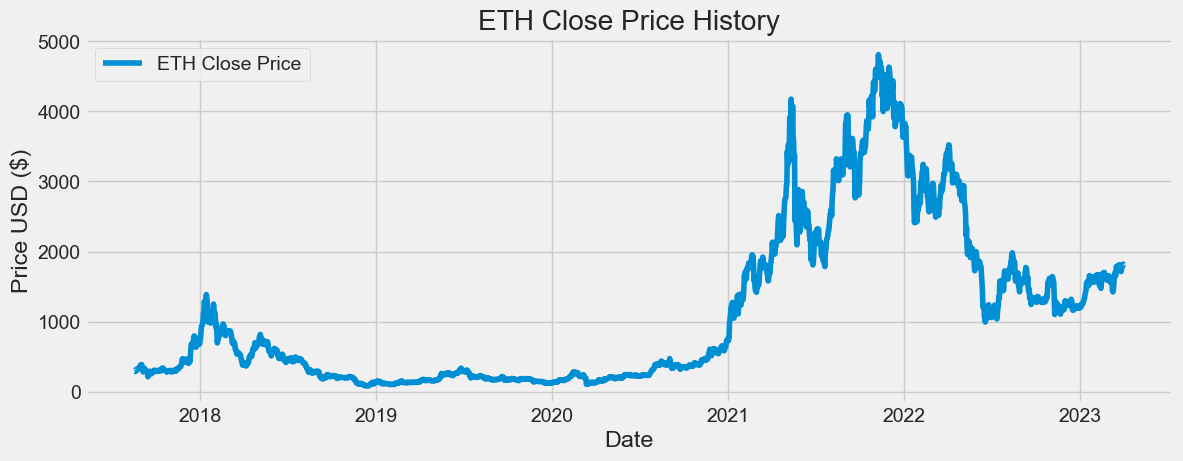

In [12]:
# Cell 12
# Plot close price history
plot_close_price_history(df)

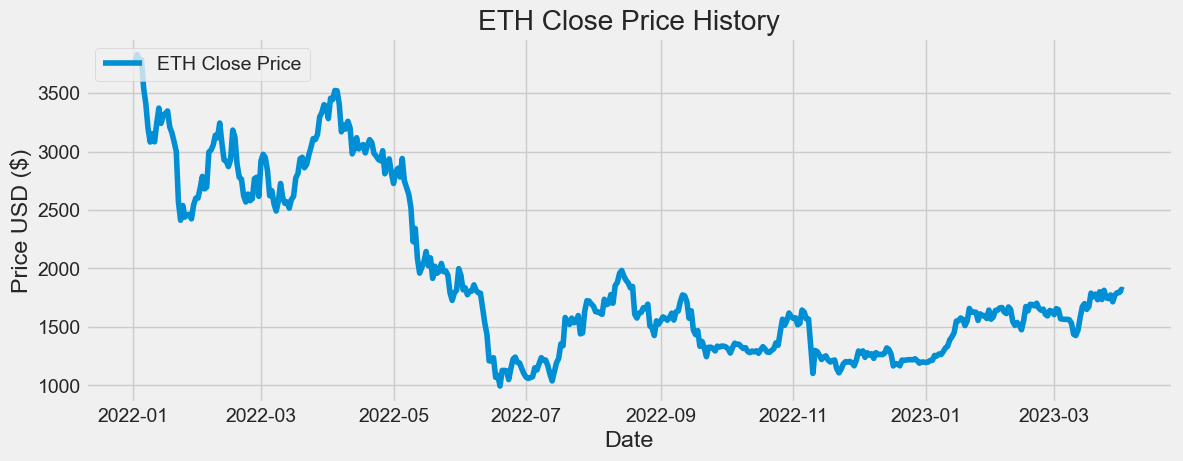

In [13]:
# Cell 13
# Slice data and plot
sliced_df = slice_data_by_date(df, '2022-01-01')
plot_close_price_history(sliced_df)

/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_99294/247123080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df.loc[:, column_name] = sliced_df['close_price'].rolling(ma).mean()
/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_99294/247123080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df.loc[:, column_name] = sliced_df['close_price'].rolling(ma).mean()
/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_99294/247123080.py:5: SettingWithCopyWarning: 


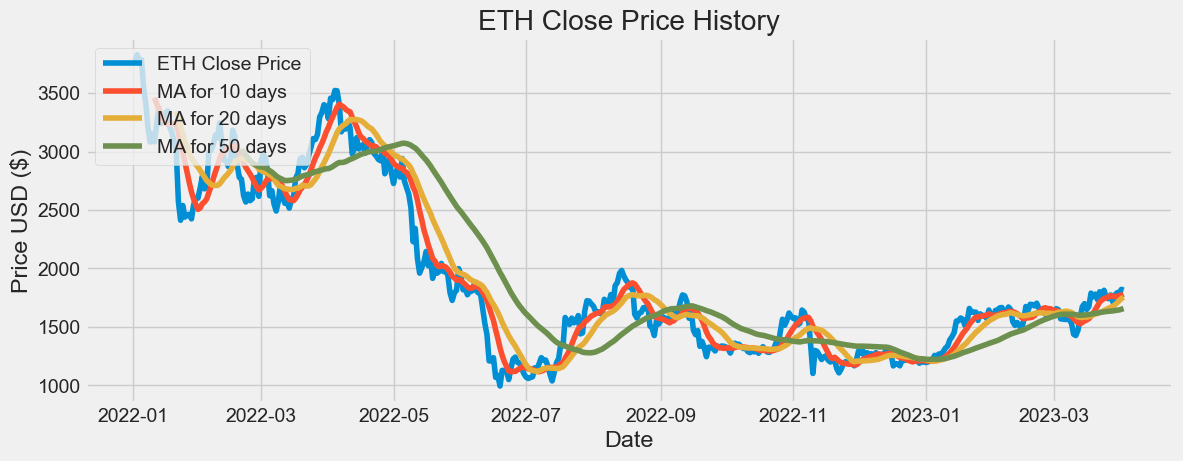

In [14]:
# Cell 14
# Add moving averages
sliced_df = add_moving_averages(sliced_df, ma_days=[10, 20, 50])
plot_moving_averages(sliced_df, ma_days=[10, 20, 50])

/var/folders/fx/3kl00f6x4bq3c7ymjd8v16qr0000gn/T/ipykernel_99294/2020939914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_df['daily_return'] = sliced_df['close_price'].pct_change()


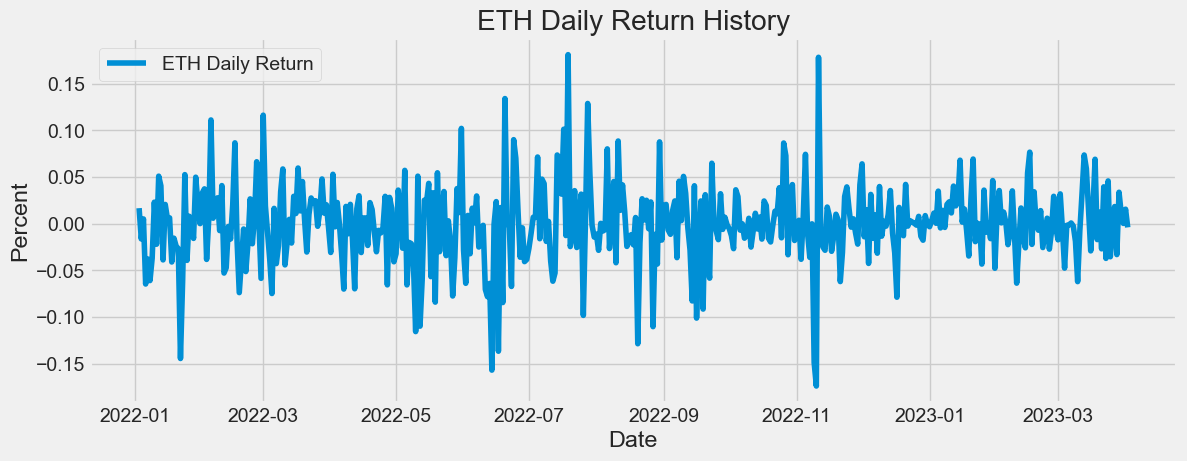

In [15]:
# Cell 15
# Add daily returns
sliced_df = add_daily_returns(sliced_df)
plot_daily_returns(sliced_df)

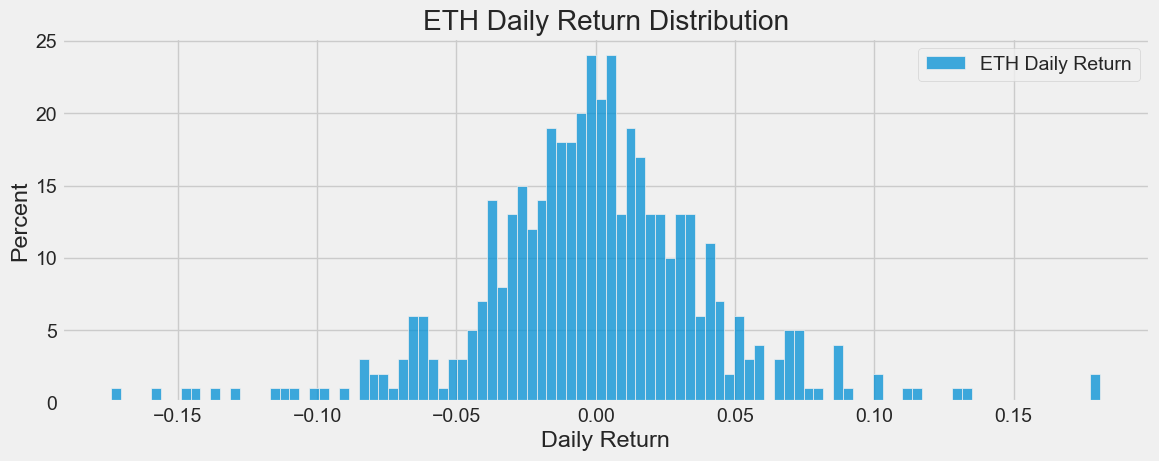

In [16]:
# Cell 16
# Plot daily return distribution
plot_daily_return_distribution(sliced_df)

In [17]:
def preprocess_data_for_lstm(sliced_df, time_step, train_percent):
    data = sliced_df.filter(['close_price'])
    dataset = data.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Determine the index to split the data into training and testing
    training_data_len = int(np.ceil(len(dataset) * train_percent))
    
    # Create the training dataset
    train_data = scaled_data[:training_data_len]
    x_train = []
    y_train = []
    for i in range(time_step, len(train_data)):
        x_train.append(train_data[i-time_step:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    # Create the testing dataset
    test_data = scaled_data[training_data_len - time_step:]
    x_test = []
    y_test = []
    for i in range(time_step, len(test_data)):
        x_test.append(test_data[i-time_step:i, 0])
        y_test.append(test_data[i, 0])
    x_test, y_test = np.array(x_test), np.array(y_test)
    
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    return x_train, y_train, x_test, y_test, scaler

In [18]:
# Cell 21
def make_predictions(x_test, model):    
    # Make predictions on the entire dataset
    predictions = model.predict(x_test)
    
    return predictions

In [19]:
def plot_predictions(dates, predictions, y_test, scaler):
    """
    Plot the predictions and actual prices.
    
    Parameters:
        dates (list): List of dates corresponding to the data points.
        predictions (array): Predicted prices.
        y_test (array): Actual prices.
        scaler (Scaler): The scaler used to inverse transform the predictions.
    """
    
    # Undo scaling
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Plot the data
    plt.figure(figsize=(12.5, 4.5))
    plt.plot(dates, y_test, label='Actual ETH Price')
    plt.plot(dates, predictions, label='Predicted ETH Price')
    plt.title('ETH Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price USD ($)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.legend(loc='upper left')
    plt.show()

In [91]:
def simulate_trading(predicted_prices, target_prices, initial_budget):
    """
    Simulate trading based on predicted prices.
    
    Parameters:
        predicted_prices (list): List of predicted prices.
        target_prices (list): List of actual target prices.
        initial_budget (float): Initial budget in USD.
        
    Returns:
        float: Final budget after trading.
    """
    
    if len(predicted_prices) != len(target_prices):
        raise ValueError("predicted_prices and target_prices should have the same length")
    
    budget = initial_budget
    eth_holding = 0.0
    
    # Iterate through the predicted prices
    for i in range(len(predicted_prices) - 1):
        # Buy ETH if the next predicted price is higher and user has budget
        if predicted_prices[i + 1] > target_prices[i] and budget > 0:
            # Check if target_price is zero to avoid division by zero
            if target_prices[i] == 0:
                continue
            eth_holding = budget / target_prices[i]
            budget = 0
            
        # Sell ETH if the next predicted price is lower and user has ETH
        elif predicted_prices[i + 1] < target_prices[i] and eth_holding > 0:
            budget = eth_holding * target_prices[i]
            eth_holding = 0
            
    # Sell remaining ETH holding at the last target price
    if eth_holding > 0:
        budget = eth_holding * target_prices[-1]
    
    return budget


In [92]:
def simulate_hold_and_wait(target_prices, initial_budget):
    """
    Simulate hold and wait strategy.
    
    Parameters:
        target_prices (list): List of actual target prices.
        initial_budget (float): Initial budget in USD.
        
    Returns:
        float: Final budget after trading.
    """
    
    return initial_budget / target_prices[0] * target_prices[-1]

In [116]:
def simulate_with_different(y_predicted_all, y_test_all, look_back, initial_budget):
    y_predicted = y_predicted_all[look_back:]
    y_test = y_test_all[look_back:]
    
    budget_trading = simulate_trading(y_predicted, y_test, initial_budget)
    budget_hold_and_wait = simulate_hold_and_wait(y_test, initial_budget)

    return budget_trading, budget_hold_and_wait
        

In [117]:
def read_train_evalute(path, slice_date, look_back, initial_budget=1000, epochs=1):
    df = load_data(path)
    sliced_df = slice_data_by_date(df, slice_date)
    x_train, y_train, x_test, y_test, scaler = preprocess_data_for_lstm(sliced_df, look_back, train_percent=0.8)
    model = create_lstm_model(x_train)
    model.fit(x_train, y_train, batch_size=1, epochs=epochs)
    predictions = make_predictions(x_test, model)

    #inverse transform
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    trading, wait = simulate_with_different(predictions, y_test, look_back, initial_budget)

    print(f"Trading: {trading}")
    print(f"Hold and Wait: {wait}")

In [118]:
# Cell 22
# Make predictions and plot results
# test_df = slice_data_by_date(df, '2022-02-01')
# x_test, y_test, scaler = preprocess_data_for_lstm(test_df)
# y_predicted = make_predictions(x_test, model)
# times = test_df['close_time'][60:]
# plot_predictions(times, y_predicted, y_test, scaler)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_predicted = scaler.inverse_transform(y_predicted)

In [119]:
read_train_evalute('./data/1day.csv', '2022-01-01', 5, 1000, 1)

3/3 [==============================] - 0s 1ms/step
Trading: [1056.2497279]
Hold and Wait: [1429.58223679]


In [44]:
paths = ['./data/1week.csv', './data/1day.csv', './data/8hour.csv', './data/1hour.csv', './data/2hour.csv', './data/4hour.csv']
look_backs = [1, 7, 21, 168, 84, 42]
for path in paths:
    print(path)
    read_train_evalute(path, '2021-01-01', 10, 1000)
    print()


./data/1week.csv
1/1 [==============================] - 0s 302ms/step
13
Trading: 116.55402579587467
Hold and Wait: 116.55402579587467

./data/1day.csv


KeyboardInterrupt: 